# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv("/datasets/car_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
df['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get basic statistics for numerical columns
print(df.describe())


        DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  24/03/2016 11:52    480         NaN              1993  manual      0   
1  24/03/2016 10:58  18300       coupe              2011  manual    190   
2  14/03/2016 12:52   9800         suv              2004    auto    163   
3  17/03/2016 16:54   1500       small              2001  manual     75   
4  31/03/2016 17:25   3600       small              2008  manual     69   

   Model  Mileage  RegistrationMonth  FuelType       Brand NotRepaired  \
0   golf   150000                  0    petrol  volkswagen         NaN   
1    NaN   125000                  5  gasoline        audi         yes   
2  grand   125000                  8  gasoline        jeep         NaN   
3   golf   150000                  6    petrol  volkswagen          no   
4  fabia    90000                  7  gasoline       skoda          no   

        DateCreated  NumberOfPictures  PostalCode          LastSeen  
0  24/03/2016 00:00               

In [5]:
# Check the unique values in categorical columns
print("Vehicle Type")
print(df['VehicleType'].unique())

print("///////////////////////////////////////////\nGear Box")
print(df['Gearbox'].unique())

print("///////////////////////////////////////////\nFuel Type")
print(df['FuelType'].unique())

print("///////////////////////////////////////////\nBrand")
print(df['Brand'].unique())

print("Not Repaired")
print(df['NotRepaired'].unique())


Vehicle Type
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
///////////////////////////////////////////
Gear Box
['manual' 'auto' nan]
///////////////////////////////////////////
Fuel Type
['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
///////////////////////////////////////////
Brand
['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'porsche'
 'rover' 'land_rover' 'lada']
Not Repaired
[nan 'yes' 'no']


In [6]:
"Aqui empezamos con el limpiado de datos"

'Aqui empezamos con el limpiado de datos'

In [7]:
# Muestra las primeras filas de la columna DateCrawled
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%d/%m/%Y %H:%M')
print(df['DateCrawled'].head())
# Extraer características numéricas
df['YearCrawled'] = df['DateCrawled'].dt.year
df['MonthCrawled'] = df['DateCrawled'].dt.month
df['DayCrawled'] = df['DateCrawled'].dt.day
df['HourCrawled'] = df['DateCrawled'].dt.hour
df['DayOfWeekCrawled'] = df['DateCrawled'].dt.dayofweek  # Lunes=0, Domingo=6

# Mostrar las primeras filas para verificar
print(df[['DateCrawled', 'YearCrawled', 'MonthCrawled', 'DayCrawled', 'HourCrawled', 'DayOfWeekCrawled']].head())

# Eliminar la columna original DateCrawled
df = df.drop('DateCrawled', axis=1)

0   2016-03-24 11:52:00
1   2016-03-24 10:58:00
2   2016-03-14 12:52:00
3   2016-03-17 16:54:00
4   2016-03-31 17:25:00
Name: DateCrawled, dtype: datetime64[ns]
          DateCrawled  YearCrawled  MonthCrawled  DayCrawled  HourCrawled  \
0 2016-03-24 11:52:00         2016             3          24           11   
1 2016-03-24 10:58:00         2016             3          24           10   
2 2016-03-14 12:52:00         2016             3          14           12   
3 2016-03-17 16:54:00         2016             3          17           16   
4 2016-03-31 17:25:00         2016             3          31           17   

   DayOfWeekCrawled  
0                 3  
1                 3  
2                 0  
3                 3  
4                 3  


In [8]:
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%d/%m/%Y %H:%M')
# Extraer características numéricas
df['YearLastSeen'] = df['LastSeen'].dt.year
df['MonthLastSeen'] = df['LastSeen'].dt.month
df['DayLastSeen'] = df['LastSeen'].dt.day
df['HourLastSeen'] = df['LastSeen'].dt.hour
df['DayOfWeekLastSeen'] = df['LastSeen'].dt.dayofweek

# Eliminar la columna original LastSeen
df = df.drop('LastSeen', axis=1)

# Verificar la conversión
print(df[['YearLastSeen', 'MonthLastSeen', 'DayLastSeen', 'HourLastSeen', 'DayOfWeekLastSeen']].head())


   YearLastSeen  MonthLastSeen  DayLastSeen  HourLastSeen  DayOfWeekLastSeen
0          2016              4            7             3                  3
1          2016              4            7             1                  3
2          2016              4            5            12                  1
3          2016              3           17            17                  3
4          2016              4            6            10                  2


In [9]:
# Convertir DateCreated a tipo datetime
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%d/%m/%Y %H:%M')

# Extraer características numéricas
df['YearCreated'] = df['DateCreated'].dt.year
df['MonthCreated'] = df['DateCreated'].dt.month
df['DayCreated'] = df['DateCreated'].dt.day

# Eliminar la columna original DateCreated
df = df.drop('DateCreated', axis=1)

# Verificar la conversión
print(df[['YearCreated', 'MonthCreated', 'DayCreated']].head())

   YearCreated  MonthCreated  DayCreated
0         2016             3          24
1         2016             3          24
2         2016             3          14
3         2016             3          17
4         2016             3          31


In [10]:
df = df.dropna(subset=['Price', 'VehicleType', 'Gearbox', 'FuelType', 'Brand'])

df['NotRepaired'] = df['NotRepaired'].fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293565 entries, 1 to 354368
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              293565 non-null  int64 
 1   VehicleType        293565 non-null  object
 2   RegistrationYear   293565 non-null  int64 
 3   Gearbox            293565 non-null  object
 4   Power              293565 non-null  int64 
 5   Model              284126 non-null  object
 6   Mileage            293565 non-null  int64 
 7   RegistrationMonth  293565 non-null  int64 
 8   FuelType           293565 non-null  object
 9   Brand              293565 non-null  object
 10  NotRepaired        293565 non-null  object
 11  NumberOfPictures   293565 non-null  int64 
 12  PostalCode         293565 non-null  int64 
 13  YearCrawled        293565 non-null  int64 
 14  MonthCrawled       293565 non-null  int64 
 15  DayCrawled         293565 non-null  int64 
 16  HourCrawled        2

In [11]:
"Aqui checo los años de registro y veo sus maximos y minimos asi como checar cuantos carros hay por año, junto con un histograma."

'Aqui checo los años de registro y veo sus maximos y minimos asi como checar cuantos carros hay por año, junto con un histograma.'

2018

1910

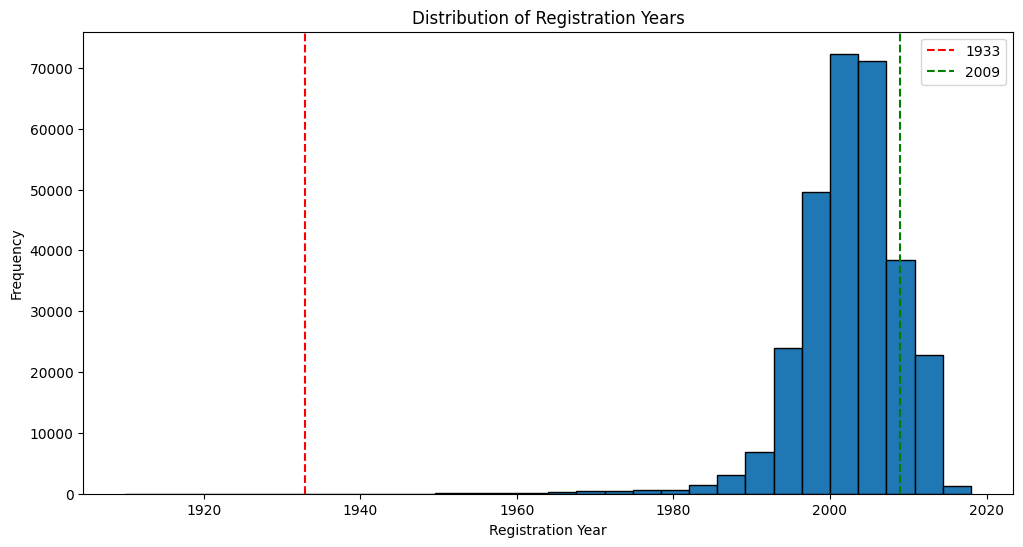

Cars Per Year

1910    10
1919     1
1923     2
1927     1
1928     1
1929     3
1930     3
1931     1
1932     2
1933     1
Name: RegistrationYear, dtype: int64
2009    13751
2010    10255
2011     9487
2012     6896
2013     3950
2014     2406
2015     1064
2016      161
2017       13
2018        4
Name: RegistrationYear, dtype: int64


In [12]:
display(df['RegistrationYear'].max())
display(df['RegistrationYear'].min())

plt.figure(figsize=(12, 6))
plt.hist(df['RegistrationYear'], bins=30, edgecolor='black')
plt.title('Distribution of Registration Years')
plt.xlabel('Registration Year')
plt.ylabel('Frequency')
plt.axvline(1933, color='red', linestyle='--', label='1933')
plt.axvline(2009, color='green', linestyle='--', label='2009')
plt.legend()
plt.show()

print("Cars Per Year\n")
year_counts = df['RegistrationYear'].value_counts().sort_index()
print(year_counts.head(10))  
print(year_counts.tail(10))  

In [13]:
model_price = df.groupby('Model')['Price'].mean().sort_values(ascending=False)
print(model_price.head(10))  # Top 10 most expensive models
print(model_price.tail(10))  # Top 10 least expensive models

Model
gl                   16965.076923
glk                  16823.200000
q5                   15843.989691
a5                   15683.762906
q7                   15631.565445
range_rover_sport    15273.037736
v60                  15039.743590
cc                   14635.570248
q3                   14374.142857
tiguan               14261.311075
Name: Price, dtype: float64
Model
escort        955.469719
nubira        943.725490
cordoba       941.190031
r19           935.186047
seicento      837.596929
lybra         798.209302
samara        785.428571
move          635.069767
lanos         614.150000
elefantino    489.857143
Name: Price, dtype: float64


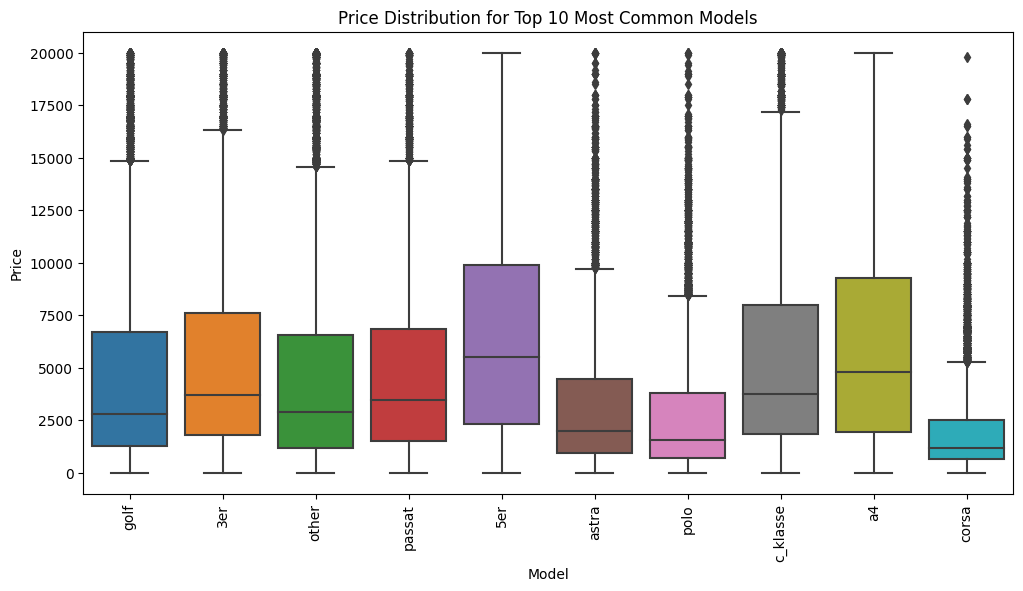

In [14]:
top_models = df['Model'].value_counts().nlargest(10).index

top_expensive_models = df.groupby('Model')['Price'].mean().nlargest(10).index

df_top_models = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price', data=df_top_models)
plt.xticks(rotation=90)
plt.title('Price Distribution for Top 10 Most Common Models')
plt.show()

In [15]:
df['Price'].sample(20)
print(df['Price'].max())


20000


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Buen trabajo en la preparación de los datos! Has realizado un análisis exploratorio inicial bastante completo, verificando información clave como valores únicos en variables categóricas, estadísticas descriptivas y detección de valores nulos. Además, la transformación de fechas para extraer características adicionales es una excelente práctica que puede mejorar la calidad del modelo. ✅

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - La conversión de columnas de fecha es un buen enfoque, pero podrías optimizar el código al trabajar con pd.to_datetime() antes de la carga inicial, si es posible, y manejar errores con errors='coerce' para evitar posibles fallos en la conversión. Además, cuando eliminas valores nulos con dropna(), asegúrate de revisar cuántos datos se pierden, ya que podría afectar la calidad del modelo. Puedes agregar un print(df.shape) antes y después de la limpieza para medir su impacto. 📉

</div>

## Entrenamiento del modelo 

In [16]:
df = pd.get_dummies(df, columns=['VehicleType', 'Gearbox', 'FuelType', 'NotRepaired'], drop_first=True)

label_encoder = LabelEncoder()

df['Model'] = label_encoder.fit_transform(df['Model'])
df['Brand'] = label_encoder.fit_transform(df['Brand'])

In [17]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
train_time_lr = None

print("Iniciando el entrenamiento...")
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
train_time_lr = end_time - start_time
print("Entrenamiento completado.")

y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'RMSE (Regresión Lineal): {rmse_lr}')
print(f'R² Score (Regresión Lineal): {r2_lr}')
print(f'Tiempo de entrenamiento: {train_time_lr:.2f} segundos')


Iniciando el entrenamiento...
Entrenamiento completado.
RMSE (Regresión Lineal): 3163.268955037366
R² Score (Regresión Lineal): 0.5345329036236044
Tiempo de entrenamiento: 0.24 segundos


In [52]:
# Definir el modelo con hiperparámetros predeterminados
rf = RandomForestRegressor(random_state=42, n_estimators=100, verbose=2)
train_time_rf = None  # Variable para el tiempo

# Ajustar el modelo a los datos de entrenamiento
print("Iniciando el entrenamiento...")
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
train_time_rf = end_time - start_time
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Calcular el RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Calcular el R² score
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir resultados
print(f'RMSE (Random Forest): {rmse_rf}')
print(f'R² Score (Random Forest): {r2_rf}')
print(f'Tiempo de entrenamiento: {train_time_rf:.2f} segundos')

Iniciando el entrenamiento...
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.2min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.9s


RMSE (Random Forest): 1660.3304229595992
R² Score (Random Forest): 0.8717652292843222
Tiempo de entrenamiento: 178.96 segundos


In [51]:
# Definir el modelo con hiperparámetros predeterminados
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, verbosity=2)
train_time_xgb = None

# Ajustar el modelo a los datos de entrenamiento
print("Iniciando el entrenamiento...")
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
train_time_xgb = end_time - start_time
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular el RMSE
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Calcular el R² score
r2_xgb = r2_score(y_test, y_pred_xgb)

# Imprimir resultados
print(f'RMSE (XGBoost): {rmse_xgb}')
print(f'R² Score (XGBoost): {r2_xgb}')
print(f'Tiempo de entrenamiento: {train_time_xgb:.2f} segundos')


Iniciando el entrenamiento...
[22:09:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:22] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:23] INFO: ../src/tree/updater_prune.cc:101: tree pruning en

[22:09:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:41] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:09:41] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned no

In [50]:
# Definir el modelo con hiperparámetros predeterminados
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100, verbose=2)
train_time_lgb = None

# Ajustar el modelo a los datos de entrenamiento
print("Iniciando el entrenamiento...")
start_time = time.time()
lgb_model.fit(X_train, y_train)
end_time = time.time()
train_time_lgb = end_time - start_time
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
y_pred_lgb = lgb_model.predict(X_test)

# Calcular el RMSE
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)

# Calcular el R² score
r2_lgb = r2_score(y_test, y_pred_lgb)

# Imprimir resultados
print(f'RMSE (LightGBM): {rmse_lgb}')
print(f'R² Score (LightGBM): {r2_lgb}')
print(f'Tiempo de entrenamiento: {train_time_lgb:.2f} segundos')

Iniciando el entrenamiento...
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871318
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.250860
[LightGBM] [Debug] init for col-wise cost 0.004833 seconds, init for row-wise cost 0.173347 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 234852, number of used features: 33
[LightGBM] [Info] Start training from score 4810.595933
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 6
[LightGBM] [Debug] Trained a tree with leaves = 31 and dept

In [49]:
# Definir el modelo con hiperparámetros predeterminados
cb_model = CatBoostRegressor(random_state=42, iterations=100, learning_rate=0.1, depth=6, verbose=2)
train_time_cb = None

# Ajustar el modelo a los datos de entrenamiento
print("Iniciando el entrenamiento...")
start_time = time.time()
cb_model.fit(X_train, y_train)
end_time = time.time()
train_time_cb = end_time - start_time
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
y_pred_cb = cb_model.predict(X_test)

# Calcular el RMSE
rmse_cb = mean_squared_error(y_test, y_pred_cb, squared=False)

# Calcular el R² score
r2_cb = r2_score(y_test, y_pred_cb)

# Imprimir resultados
print(f'RMSE (CatBoost): {rmse_cb}')
print(f'R² Score (CatBoost): {r2_cb}')
print(f'Tiempo de entrenamiento: {train_time_cb:.2f} segundos')

Iniciando el entrenamiento...
0:	learn: 4322.6305361	total: 34.6ms	remaining: 3.43s
2:	learn: 3816.9637977	total: 97.1ms	remaining: 3.14s
4:	learn: 3429.9565125	total: 163ms	remaining: 3.1s
6:	learn: 3136.8833710	total: 223ms	remaining: 2.96s
8:	learn: 2906.5905348	total: 293ms	remaining: 2.96s
10:	learn: 2730.9611992	total: 353ms	remaining: 2.85s
12:	learn: 2599.7882824	total: 410ms	remaining: 2.74s
14:	learn: 2495.4098934	total: 471ms	remaining: 2.67s
16:	learn: 2413.9044295	total: 533ms	remaining: 2.6s
18:	learn: 2349.1942127	total: 599ms	remaining: 2.55s
20:	learn: 2293.2197546	total: 662ms	remaining: 2.49s
22:	learn: 2251.5949958	total: 720ms	remaining: 2.41s
24:	learn: 2214.3363045	total: 786ms	remaining: 2.36s
26:	learn: 2179.0144244	total: 846ms	remaining: 2.29s
28:	learn: 2149.9186162	total: 907ms	remaining: 2.22s
30:	learn: 2124.3171751	total: 961ms	remaining: 2.14s
32:	learn: 2101.0964665	total: 1.02s	remaining: 2.08s
34:	learn: 2078.2800276	total: 1.09s	remaining: 2.02s
36:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Impresionante trabajo! Has implementado correctamente un pipeline de entrenamiento con múltiples modelos de regresión, incluyendo regresión lineal, Random Forest, XGBoost, LightGBM y CatBoost. Este enfoque comparativo te permitirá identificar cuál modelo ofrece el mejor balance entre precisión y tiempo de entrenamiento. También es excelente que hayas medido el tiempo de entrenamiento de cada modelo y calculado métricas clave como RMSE y R² Score. ✅🎯

</div>

## Análisis del modelo

In [53]:
# Crear diccionarios con las métricas de cada modelo
rmse_results = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'LightGBM': rmse_lgb,
    'XGBoost': rmse_xgb,
    'CatBoost': rmse_cb
}

r2_results = {
    'Linear Regression': r2_lr,
    'Random Forest': r2_rf,
    'LightGBM': r2_lgb,
    'XGBoost': r2_xgb,
    'CatBoost': r2_cb
}

train_times = {
    'Linear Regression': train_time_lr,
    'Random Forest': train_time_rf,
    'LightGBM': train_time_lgb,
    'XGBoost': train_time_xgb,
    'CatBoost': train_time_cb
}

# Imprimir los resultados comparativos
print("\n--- Evaluación de Modelos: Velocidad y Calidad ---\n")

# Analizar los resultados
for model in rmse_results:
    print(f"Modelo: {model}")
    print(f"   RMSE (Precisión): {rmse_results[model]:.4f}")
    print(f"   R² Score (Calidad): {r2_results[model]:.4f}")
    print(f"   Tiempo de Entrenamiento: {train_times[model]:.2f} segundos\n")

# Comparar el mejor RMSE, el mejor R² Score y el más rápido
best_rmse_model = min(rmse_results, key=rmse_results.get)
best_r2_model = max(r2_results, key=r2_results.get)
fastest_model = min(train_times, key=train_times.get)

# Imprimir el mejor modelo para cada métrica
print(f"⭐ Mejor Modelo por RMSE (Precisión): {best_rmse_model} con RMSE de {rmse_results[best_rmse_model]:.4f}")
print(f"⭐ Mejor Modelo por R² Score (Calidad): {best_r2_model} con R² de {r2_results[best_r2_model]:.4f}")
print(f"⭐ Modelo Más Rápido (Tiempo de Entrenamiento): {fastest_model} con un tiempo de {train_times[fastest_model]:.2f} segundos")



--- Evaluación de Modelos: Velocidad y Calidad ---

Modelo: Linear Regression
   RMSE (Precisión): 3163.2690
   R² Score (Calidad): 0.5345
   Tiempo de Entrenamiento: 0.24 segundos

Modelo: Random Forest
   RMSE (Precisión): 1660.3304
   R² Score (Calidad): 0.8718
   Tiempo de Entrenamiento: 178.96 segundos

Modelo: LightGBM
   RMSE (Precisión): 1744.4643
   R² Score (Calidad): 0.8584
   Tiempo de Entrenamiento: 3.94 segundos

Modelo: XGBoost
   RMSE (Precisión): 1967.9295
   R² Score (Calidad): 0.8198
   Tiempo de Entrenamiento: 24.33 segundos

Modelo: CatBoost
   RMSE (Precisión): 1867.1194
   R² Score (Calidad): 0.8378
   Tiempo de Entrenamiento: 3.32 segundos

⭐ Mejor Modelo por RMSE (Precisión): Random Forest con RMSE de 1660.3304
⭐ Mejor Modelo por R² Score (Calidad): Random Forest con R² de 0.8718
⭐ Modelo Más Rápido (Tiempo de Entrenamiento): Linear Regression con un tiempo de 0.24 segundos


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

✨ **¡Excelente trabajo en el análisis del modelo!** Has organizado muy bien la evaluación comparativa, estructurando las métricas clave como RMSE, R² Score y tiempo de entrenamiento de manera clara y comprensible. Además, destacar el mejor modelo en cada categoría facilita la toma de decisiones sobre cuál modelo elegir. ✅  

💡 **Algunas ideas para mejorar aún más tu análisis:**  
- **Visualización de resultados:** Presentar estos datos en una tabla o gráfico de barras podría hacer que la comparación sea aún más intuitiva y rápida de interpretar. A veces, una imagen dice más que muchos números.  
- **Balance entre precisión y velocidad:** No siempre el modelo con el mejor RMSE es la mejor opción si su tiempo de entrenamiento es demasiado alto. Analizar qué modelo ofrece el mejor compromiso entre precisión y velocidad podría ser valioso.  
- **Evaluación de estabilidad:** Comparar el desempeño en datos de entrenamiento vs. prueba podría ayudar a detectar posibles problemas de sobreajuste o subajuste en los modelos.  


</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores- [ ]  Las celdas con el código han sido colocadas en orden de ejecución- [ ]  Los datos han sido descargados y preparados- [ ]  Los modelos han sido entrenados
- [ ]  Se realizó el análisis de velocidad y calidad de los modelos

Rusty Bargain debe considerar lo siguiente al elegir un modelo:

Si la precisión es lo más importante, Random Forest es el modelo recomendado, ya que tiene el mejor RMSE y mejor R² Score.
Sin embargo, su tiempo de entrenamiento es significativamente más largo que otros modelos.
Si la velocidad de entrenamiento es clave y no se requiere la mayor precisión posible,
Linear Regression es el modelo más adecuado debido a su bajo tiempo de entrenamiento,
pero con un R² mucho más bajo que los modelos más complejos.
LightGBM, XGBoost y CatBoost son opciones intermedias que ofrecen un buen equilibrio entre
precisión y velocidad de entrenamiento. Estos modelos no son tan rápidos como la regresión lineal,
pero son significativamente más rápidos que Random Forest y aún mantienen una buena precisión.

Si la prioridad es la calidad de las predicciones, Random Forest es la opción.
Si se valora más la velocidad de predicción y entrenamiento,
entonces Linear Regression o los modelos como LightGBM o CatBoost serían más adecuados.

# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

🎉 **¡Felicidades!** Has desarrollado un análisis de modelos sólido y bien estructurado, demostrando un buen manejo del procesamiento de datos, selección de modelos y evaluación de desempeño.  

### **Puntos Fuertes:**
✅ **Limpieza y preparación de datos bien realizada**, con transformaciones relevantes y eliminación de valores nulos.  
✅ **Comparación entre múltiples modelos**, evaluando no solo la precisión, sino también la eficiencia en tiempo de entrenamiento.  
✅ **Análisis detallado de métricas** como RMSE y R² Score, facilitando la identificación del mejor modelo.  
✅ **Código organizado y claro**, lo que mejora la legibilidad y facilita futuras mejoras.  

### **Áreas de Mejora:**
🔹 **Visualización de resultados:** Incorporar gráficos para la comparación de métricas podría hacer tu análisis aún más comprensible.  
🔹 **Análisis de balance entre precisión y velocidad:** Evaluar cuál modelo ofrece el mejor rendimiento considerando tanto RMSE como tiempo de entrenamiento.  
🔹 **Pruebas adicionales para evitar sobreajuste:** Comparar el desempeño en datos de entrenamiento y prueba para asegurar que el modelo generaliza bien.  

🚀 **Próximo paso:** Si quieres mejorar aún más tu modelo, podrías experimentar con la optimización de hiperparámetros o técnicas avanzadas de feature engineering.  

¡Gran trabajo! Sigue explorando y perfeccionando tus habilidades en modelado de datos. 😊💪  

</div>